In [1]:
import numpy as np
import xcorr
import matplotlib.pyplot as plt
from twentyonecmFAST import load_binary_data
from matplotlib.colors import SymLogNorm
from scipy.ndimage import gaussian_filter

In [105]:
T_8 = load_binary_data('../../data/delta_T_v3_z008.06_nf0.553432_useTs1_256_200Mpc')
T_8 = np.reshape(T_8, (256, 256, 256))[:, :, 128]
T_7 = load_binary_data('../../data/delta_T_v3_z007.04_nf0.233584_useTs1_256_200Mpc')
T_7 = np.reshape(T_7, (256, 256, 256))[:, :, 128]
T_6 = load_binary_data('../../data/delta_T_v3_z006.00_nf0.025588_useTs1_256_200Mpc')
T_6 = np.reshape(T_6, (256, 256, 256))[:, :, 128]

In [106]:
halos = np.loadtxt('../../data/halos_z7.04_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]
I_7 = xcorr.cube_brightness(halo_mass, halo_pos, z = 7.04)[:, :, 128]

halos = np.loadtxt('../../data/halos_z8.06_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]
I_8 = xcorr.cube_brightness(halo_mass, halo_pos, z = 8.04)[:, :, 128]

halos = np.loadtxt('../../data/halos_z6.00_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]
I_6 = xcorr.cube_brightness(halo_mass, halo_pos, z = 6.)[:, :, 128]

In [107]:
smooth = 1.

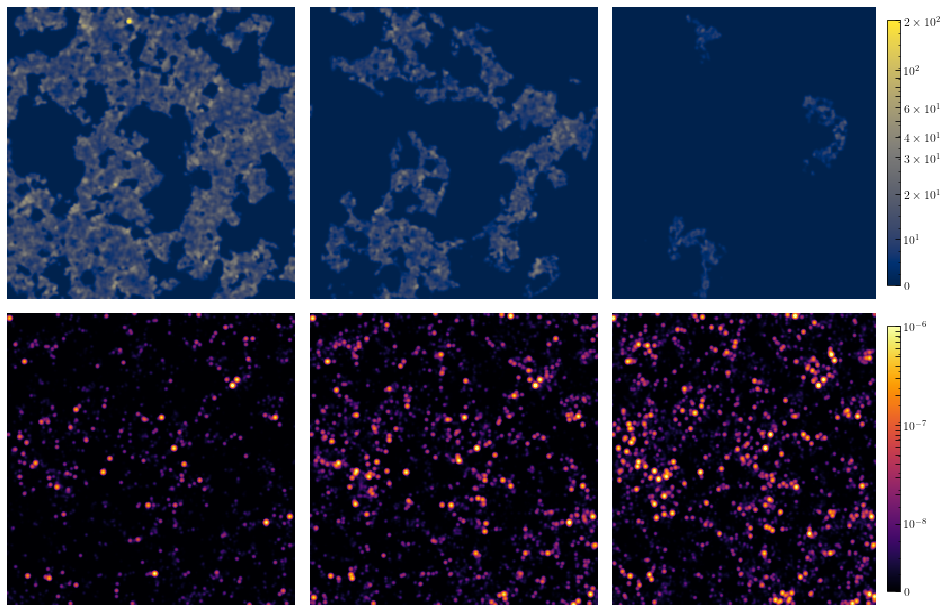

In [109]:
fig, ax = plt.subplots(2, 3, figsize = (16,11))

ax = ax.ravel()

ax[0].imshow(gaussian_filter(T_8, smooth), aspect = 'auto', cmap = 'cividis', 
             norm = SymLogNorm(25, vmax = 200))
ax[0].axis('off')

ax[1].imshow(gaussian_filter(T_7, smooth), aspect = 'auto', cmap = 'cividis', 
             norm = SymLogNorm(25, vmax = 200))
ax[1].axis('off')

a = ax[2].imshow(gaussian_filter(T_6, smooth), aspect = 'auto', cmap = 'cividis', 
             norm = SymLogNorm(25, vmax = 200))
ax[2].axis('off')

ax[3].imshow(gaussian_filter(I_8, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-8, vmax = 1e-6))
ax[3].axis('off')

ax[4].imshow(gaussian_filter(I_7, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-8, vmax = 1e-6))
ax[4].axis('off')

b = ax[5].imshow(gaussian_filter(I_6, smooth), aspect = 'auto', cmap = 'inferno',
             norm = SymLogNorm(1e-8, vmax = 1e-6))
ax[5].axis('off')

fig.colorbar(a, ax=ax[2], fraction=0.046, pad=0.04)
fig.colorbar(b, ax=ax[5], fraction=0.046, pad=0.04)


plt.subplots_adjust(wspace = 0.05, hspace = 0.05)

plt.show()

In [69]:
kperp = np.logspace(-3, -1, 100)
kpar = np.logspace(-2, 0, 100)
k = np.logspace(-3, 0, 100)

In [137]:
T_8 = load_binary_data('../../data/delta_T_v3_z008.06_nf0.553432_useTs1_256_200Mpc')
T_8 = np.reshape(T_8, (256, 256, 256))
ps, k_perp, k_par = xcorr.get_power(T_8, 200, log_bins = True, bins = 20, res_ndim = 2)

In [140]:
x = np.linspace(0, k_perp.shape[0] - 1, 4).astype(int)
y = np.linspace(1, k_par.shape[1] / 2.0, 4).astype(int)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


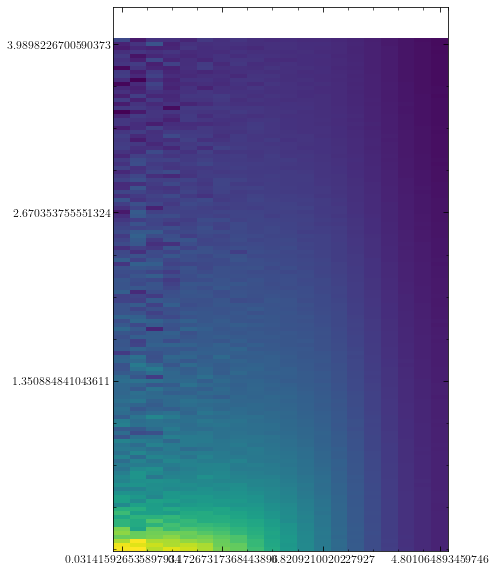

In [152]:
plt.figure(figsize = (6, 10))
plt.imshow(np.log10(ps.T[:128, :]), aspect = 'auto')
plt.xticks(x, k_perp[x])
plt.yticks(y, np.abs(k_par[0, y]))
plt.plot(k_perp, np.sqrt(k[80] ** 2 - k_perp ** 2) - 2., color = 'white', linestyle = '--', )
#plt.xlim([5e-2, 1])
#plt.ylim([])
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


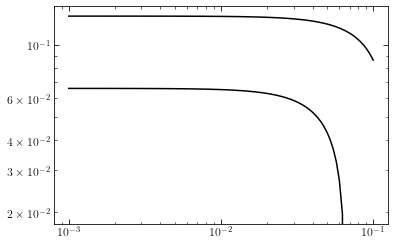

In [162]:
plt.loglog(kperp, np.sqrt(k[60] ** 2 - kperp ** 2), color = 'black', linestyle = '-', )
plt.loglog(kperp, np.sqrt(k[70] ** 2 - kperp ** 2), color = 'black', linestyle = '-', )
plt.show()